In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers

In [2]:
print(tf.__version__)

2.8.0


In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
dataset = pd.read_csv("dataset/time_series/Population/POP.csv")
len(dataset)

816

In [8]:
dataset.isna().sum()

realtime_start    0
value             0
date              0
realtime_end      0
dtype: int64

In [9]:
dataset.head()

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.0,1952-01-01,2019-12-06
1,2019-12-06,156527.0,1952-02-01,2019-12-06
2,2019-12-06,156731.0,1952-03-01,2019-12-06
3,2019-12-06,156943.0,1952-04-01,2019-12-06
4,2019-12-06,157140.0,1952-05-01,2019-12-06


In [10]:
dataset = dataset[["value", "date"]]
dataset.head()

,value,date
0,156309.0,1952-01-01
1,156527.0,1952-02-01
2,156731.0,1952-03-01
3,156943.0,1952-04-01
4,157140.0,1952-05-01


In [16]:
offset = len(dataset) - 24

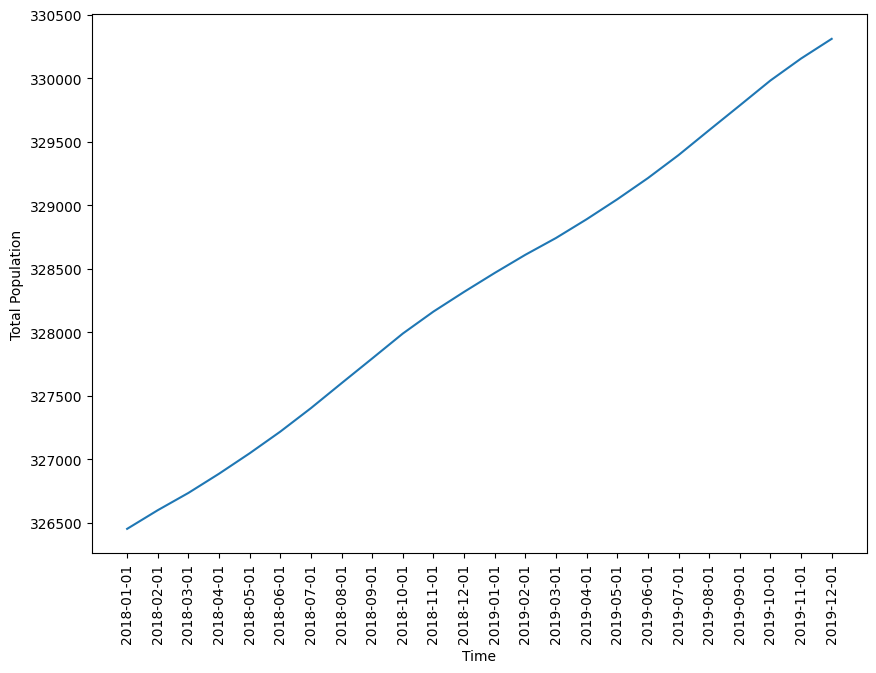

In [17]:
plt.figure(figsize=(10, 7))
plt.plot(dataset["date"][offset:], dataset["value"][offset:])
plt.xlabel("Time")
plt.ylabel("Total Population")
plt.xticks(rotation=90)
plt.show()

In [18]:
WINDOW = 12
HORIZON = 1

In [20]:
dataset = dataset[["date", "value"]]
dataset.head()

,date,value
0,1952-01-01,156309.0
1,1952-02-01,156527.0
2,1952-03-01,156731.0
3,1952-04-01,156943.0
4,1952-05-01,157140.0


In [22]:
dataset_windowed = dataset.copy()
for i in range(WINDOW):
    dataset_windowed[f"value_{i+1}"] = dataset_windowed["value"].shift(periods=i+1)
dataset_windowed.head(20)

,date,value,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,value_10,value_11,value_12
0,1952-01-01,156309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1952-02-01,156527.0,156309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952-03-01,156731.0,156527.0,156309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1952-04-01,156943.0,156731.0,156527.0,156309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1952-05-01,157140.0,156943.0,156731.0,156527.0,156309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1952-06-01,157343.0,157140.0,156943.0,156731.0,156527.0,156309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1952-07-01,157553.0,157343.0,157140.0,156943.0,156731.0,156527.0,156309.0,NaN,NaN,NaN,NaN,NaN,NaN
7,1952-08-01,157798.0,157553.0,157343.0,157140.0,156943.0,156731.0,156527.0,156309.0,NaN,NaN,NaN,NaN,NaN
8,1952-09-01,158053.0,157798.0,157553.0,157343.0,157140.0,156943.0,156731.0,156527.0,156309.0,NaN,NaN,NaN,NaN
9,1952-10-01,158306.0,158053.0,157798.0,157553.0,157343.0,157140.0,156943.0,156731.0,156527.0,156309.0,NaN,NaN,NaN


In [23]:
len(dataset_windowed)

816

In [25]:
X = dataset_windowed.dropna().drop(["date", "value"], axis = 1).to_numpy()
y = dataset_windowed.dropna()["value"].to_numpy()

In [26]:
len(X), len(y)

(804, 804)

In [27]:
split_size = int(len(X) * 0.8)
X_train, y_train = tf.cast(X[:split_size], dtype=tf.float32), tf.cast(y[:split_size], dtype=tf.float32)
X_test, y_test = tf.cast(X[split_size:], dtype=tf.float32), tf.cast(y[split_size:], dtype=tf.float32)

In [28]:
len(X_train), len(y_train), len(X_test), len(y_test)

(643, 643, 161, 161)

In [29]:
X_train[:5]

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[158757., 158451., 158306., 158053., 157798., 157553., 157343.,
        157140., 156943., 156731., 156527., 156309.],
       [158973., 158757., 158451., 158306., 158053., 157798., 157553.,
        157343., 157140., 156943., 156731., 156527.],
       [159170., 158973., 158757., 158451., 158306., 158053., 157798.,
        157553., 157343., 157140., 156943., 156731.],
       [159349., 159170., 158973., 158757., 158451., 158306., 158053.,
        157798., 157553., 157343., 157140., 156943.],
       [159556., 159349., 159170., 158973., 158757., 158451., 158306.,
        158053., 157798., 157553., 157343., 157140.]], dtype=float32)>

In [30]:
y_train[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([158973., 159170., 159349., 159556., 159745.], dtype=float32)>

## Trailing window vs Centered Window

In [36]:
def create_trailing_window(data, window_size, horizon):
    """
    Creates trailing windows and corresponding horizons.

    Parameters:
    - data: list or array, the input time series data.
    - window_size: int, size of the trailing window.
    - horizon: int, the number of steps to look ahead.

    Returns:
    - windows: list of arrays, trailing windows.
    - horizons: list, corresponding horizons.
    """
    windows = []
    horizons = []

    for i in range(len(data) - window_size - horizon + 1):
        window = data[i:i + window_size]
        target = data[i + window_size:i + window_size + horizon]

        windows.append(window)
        horizons.append(target)

    return windows, horizons

def create_centered_window(data, window_size, horizon):
    """
    Creates centered windows and corresponding horizons.

    Parameters:
    - data: list or array, the input time series data.
    - window_size: int, size of the centered window.
    - horizon: int, the number of steps to look ahead.

    Returns:
    - windows: list of arrays, centered windows.
    - horizons: list, corresponding horizons.
    """
    windows = []
    horizons = []

    for i in range(len(data) - window_size - horizon + 1):
        center_index = i + window_size // 2
        window = data[center_index - window_size // 2:center_index + window_size // 2]
        target = data[center_index:center_index + horizon]

        windows.append(window)
        horizons.append(target)

    return windows, horizons

# Example usage:
time_series_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

window_size = 12
horizon = 1

trailing_windows, trailing_targets = create_trailing_window(time_series_data, window_size, horizon)
centered_windows, centered_targets = create_centered_window(time_series_data, window_size, horizon)

print("\nTrailing Windows\n")
for trailing_windows, trailing_targets in zip(trailing_windows, trailing_targets):
    print("Window:", trailing_windows, "| Target:", trailing_targets)

print("\nCentered Windows\n")
for centered_windows, centered_targets in zip(centered_windows, centered_targets):
    print("Window:", centered_windows, "| Target:", centered_targets)

Trailing Windows:
 [[ 1  2  3  4  5  6  7  8  9 10 11 12]
 [ 2  3  4  5  6  7  8  9 10 11 12 13]
 [ 3  4  5  6  7  8  9 10 11 12 13 14]
 [ 4  5  6  7  8  9 10 11 12 13 14 15]
 [ 5  6  7  8  9 10 11 12 13 14 15 16]
 [ 6  7  8  9 10 11 12 13 14 15 16 17]
 [ 7  8  9 10 11 12 13 14 15 16 17 18]
 [ 8  9 10 11 12 13 14 15 16 17 18 19]]
Trailing Targets: [13 14 15 16 17 18 19 20]
Centered Windows:
 [[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
 [ 2  3  4  5  6  7  8  9 10 11 12 13 14]
 [ 3  4  5  6  7  8  9 10 11 12 13 14 15]
 [ 4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 5  6  7  8  9 10 11 12 13 14 15 16 17]
 [ 6  7  8  9 10 11 12 13 14 15 16 17 18]
 [ 7  8  9 10 11 12 13 14 15 16 17 18 19]
 [ 8  9 10 11 12 13 14 15 16 17 18 19 20]]
Centered Targets: [ 7  8  9 10 11 12 13 14]


In [37]:
population_value = dataset["value"].to_numpy()
population_value[:3]

array([156309., 156527., 156731.])

In [42]:
population_value_centered_windows, population_value_centered_targets = create_centered_window(population_value, WINDOW, HORIZON)

In [43]:
population_value_centered_targets[:5]

array([157553., 157798., 158053., 158306., 158451.])

In [104]:
# Callbacks
import os
import datetime

LOGS_PATH = "model_logs/population"
CHECKPOINT_PATH = "model_experiments/population"

def tensorboard(model_name):
    return tf.keras.callbacks.TensorBoard(os.path.join(LOGS_PATH, 
                                                       model_name, 
                                                       datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))

def checkpoint(model_name):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(CHECKPOINT_PATH, model_name), 
                                              save_best_only=True, 
                                              monitor="val_loss")

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
                                                  patience=10, 
                                                  restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", 
                                                 factor=0.2, 
                                                 min_lr=1e-5, 
                                                 patience=5)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

In [45]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=(WINDOW), dtype=tf.float32)
x = layers.Dense(128, activation="relu")(inputs)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(HORIZON, activation=None)(x)

model_1 = tf.keras.Model(inputs, outputs, name="model_1")

model_1.compile(loss="mae",
                optimizer="adam")

model_1_history = model_1.fit(x=X_train,
                              y=y_train,
                              validation_data=(X_test, y_test),
                              epochs=100,
                              callbacks=[tensorboard(model_1.name),
                                         checkpoint(model_1.name),
                                         early_stopping,
                                         reduce_lr])

Epoch 1/100
21/21 [==============================] - 2s 51ms/step - loss: 68578.0000 - val_loss: 24332.5801 - lr: 0.0010
Epoch 2/100
21/21 [==============================] - 1s 28ms/step - loss: 5020.1406 - val_loss: 2899.8564 - lr: 0.0010
Epoch 3/100
21/21 [==============================] - 0s 6ms/step - loss: 1782.1257 - val_loss: 4281.7393 - lr: 0.0010
Epoch 4/100
21/21 [==============================] - 1s 27ms/step - loss: 3558.4785 - val_loss: 2330.8562 - lr: 0.0010
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 1664.8369 - val_loss: 4399.5063 - lr: 0.0010
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 1680.7930 - val_loss: 2829.6218 - lr: 0.0010
Epoch 7/100
21/21 [==============================] - 1s 29ms/step - loss: 1609.2433 - val_loss: 1909.8767 - lr: 0.0010
Epoch 8/100
21/21 [==============================] - 0s 6ms/step - loss: 2509.4109 - val_loss: 8260.8203 - lr: 0.0010
Epoch 9/100
21/21 [==============================]

In [46]:
model_1.evaluate(X_train, y_train), model_1.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 167.0825


(595.804443359375, 167.08248901367188)

In [47]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18,305
Trainable params: 18,305
Non-trainable params: 0
_________________________________________________________________


In [55]:
model_2 = tf.keras.Sequential([
    layers.Input(shape=(WINDOW), dtype=tf.float32),
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.LSTM(128, activation="relu"),
    layers.Dense(HORIZON, activation=None)
], name="model_2")

model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_5 (Lambda)           (None, 1, 12)             0         
                                                                 
 lstm_12 (LSTM)              (None, 128)               72192     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 72,321
Trainable params: 72,321
Non-trainable params: 0
_________________________________________________________________


In [56]:
tf.get_logger().setLevel('ERROR')

model_2.compile(loss="mae",
                optimizer="adam")

model_2_history = model_2.fit(x=X_train,
                              y=y_train,
                              epochs=100,
                              validation_data=(X_test, y_test),
                              callbacks=[tensorboard(model_2.name),
                                         checkpoint(model_2.name),
                                         reduce_lr,
                                         early_stopping])

Epoch 1/100
21/21 [==============================] - ETA: 0s - loss: 223696.7188

21/21 [==============================] - 3s 101ms/step - loss: 223696.7188 - val_loss: 248361.4844 - lr: 0.0010
Epoch 2/100
16/21 [=====================>........] - ETA: 0s - loss: 157060.7656

21/21 [==============================] - 2s 90ms/step - loss: 151445.1406 - val_loss: 164914.8750 - lr: 0.0010
Epoch 3/100
16/21 [=====================>........] - ETA: 0s - loss: 94555.9453 

21/21 [==============================] - 2s 106ms/step - loss: 87189.3594 - val_loss: 60805.8516 - lr: 0.0010
Epoch 4/100
20/21 [===========================>..] - ETA: 0s - loss: 16775.5625

21/21 [==============================] - 2s 99ms/step - loss: 16730.8730 - val_loss: 8683.4453 - lr: 0.0010
Epoch 5/100
15/21 [====================>.........] - ETA: 0s - loss: 3500.3264

21/21 [==============================] - 2s 89ms/step - loss: 3142.4531 - val_loss: 1814.0769 - lr: 0.0010
Epoch 6/100
15/21 [====================>.........] - ETA: 0s - loss: 963.8524 

21/21 [==============================] - 2s 100ms/step - loss: 821.8055 - val_loss: 541.8633 - lr: 0.0010
Epoch 7/100
21/21 [==============================] - 0s 11ms/step - loss: 273.1161 - val_loss: 684.4581 - lr: 0.0010
Epoch 8/100
21/21 [==============================] - 0s 11ms/step - loss: 271.9267 - val_loss: 543.6582 - lr: 0.0010
Epoch 9/100
21/21 [==============================] - 0s 10ms/step - loss: 470.9265 - val_loss: 1132.8888 - lr: 0.0010
Epoch 10/100
17/21 [=======================>......] - ETA: 0s - loss: 317.7041

21/21 [==============================] - 2s 89ms/step - loss: 309.9008 - val_loss: 382.9185 - lr: 2.0000e-04
Epoch 11/100
21/21 [==============================] - 0s 10ms/step - loss: 238.8614 - val_loss: 651.4022 - lr: 2.0000e-04
Epoch 12/100
21/21 [==============================] - 0s 10ms/step - loss: 247.5227 - val_loss: 464.3034 - lr: 2.0000e-04
Epoch 13/100
21/21 [==============================] - 0s 10ms/step - loss: 244.1484 - val_loss: 533.7888 - lr: 2.0000e-04
Epoch 14/100
21/21 [==============================] - 0s 10ms/step - loss: 238.3204 - val_loss: 534.8226 - lr: 4.0000e-05
Epoch 15/100
21/21 [==============================] - 0s 13ms/step - loss: 249.2293 - val_loss: 508.7521 - lr: 4.0000e-05


In [57]:
model_2.evaluate(X_train, y_train), model_2.evaluate(X_test, y_test)

6/6 [==============================] - 0s 7ms/step - loss: 382.9185


(256.4668884277344, 382.9184875488281)

In [125]:
model_3 = tf.keras.Sequential([
    layers.Input(shape=(WINDOW), dtype=tf.float32),
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(128, 12, activation="relu", padding="causal"),
    layers.GlobalAveragePooling1D(),
    layers.Dense(HORIZON)
], name="model_3")

model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_12 (Lambda)          (None, 1, 12)             0         
                                                                 
 conv1d_14 (Conv1D)          (None, 1, 128)            18560     
                                                                 
 global_average_pooling1d_9   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_16 (Dense)            (None, 1)                 129       
                                                                 
Total params: 18,689
Trainable params: 18,689
Non-trainable params: 0
_________________________________________________________________


In [126]:
model_3.compile(loss="mae",
                optimizer="adam")

model_3_history = model_3.fit(x=X_train,
                              y=y_train,
                              validation_data=(X_test, y_test),
                              epochs=100,
                              callbacks=[tensorboard(model_3.name),
                                         checkpoint(model_3.name),
                                         reduce_lr,
                                         early_stopping])

Epoch 1/100
21/21 [==============================] - 1s 41ms/step - loss: 93776.1094 - val_loss: 33979.8477 - lr: 0.0010
Epoch 2/100
21/21 [==============================] - 1s 36ms/step - loss: 8183.7480 - val_loss: 6888.6353 - lr: 0.0010
Epoch 3/100
21/21 [==============================] - 1s 37ms/step - loss: 2246.7595 - val_loss: 2840.9265 - lr: 0.0010
Epoch 4/100
21/21 [==============================] - 1s 42ms/step - loss: 1095.0273 - val_loss: 542.2490 - lr: 0.0010
Epoch 5/100
21/21 [==============================] - 0s 9ms/step - loss: 354.0774 - val_loss: 1948.8848 - lr: 0.0010
Epoch 6/100
21/21 [==============================] - 0s 9ms/step - loss: 621.4032 - val_loss: 1158.7665 - lr: 0.0010
Epoch 7/100
21/21 [==============================] - 0s 10ms/step - loss: 1287.3170 - val_loss: 4718.7246 - lr: 0.0010
Epoch 8/100
21/21 [==============================] - 0s 11ms/step - loss: 3125.3950 - val_loss: 2797.4958 - lr: 0.0010
Epoch 9/100
21/21 [==============================] 

In [127]:
model_3.evaluate(X_train, y_train), model_3.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 205.2255


(442.70135498046875, 205.2255401611328)

In [62]:
model_4 = tf.keras.Sequential([
    layers.Input(shape=(WINDOW), dtype=tf.float32),
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Bidirectional(layers.LSTM(64, activation="relu")),
    layers.Dense(HORIZON)
], name="model_4")

model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_7 (Lambda)           (None, 1, 12)             0         
                                                                 
 bidirectional (Bidirectiona  (None, 128)              39424     
 l)                                                              
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 39,553
Trainable params: 39,553
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_4.compile(loss="mae",
                optimizer="adam")

model_4_history = model_4.fit(x=X_train,
                              y=y_train,
                              validation_data=(X_test, y_test),
                              epochs=100,
                              callbacks=[tensorboard(model_4.name),
                                         checkpoint(model_4.name),
                                         early_stopping,
                                         reduce_lr])

Epoch 1/100
18/21 [========================>.....] - ETA: 0s - loss: 164158.1562

21/21 [==============================] - 7s 213ms/step - loss: 160376.6719 - val_loss: 161593.8125 - lr: 0.0010
Epoch 2/100
17/21 [=======================>......] - ETA: 0s - loss: 83761.6406

21/21 [==============================] - 4s 201ms/step - loss: 76849.7266 - val_loss: 34137.1758 - lr: 0.0010
Epoch 3/100
17/21 [=======================>......] - ETA: 0s - loss: 10487.9160

21/21 [==============================] - 4s 210ms/step - loss: 9167.0098 - val_loss: 5806.6802 - lr: 0.0010
Epoch 4/100
18/21 [========================>.....] - ETA: 0s - loss: 1926.7433

21/21 [==============================] - 4s 211ms/step - loss: 1856.0222 - val_loss: 685.0390 - lr: 0.0010
Epoch 5/100
20/21 [===========================>..] - ETA: 0s - loss: 658.7214

21/21 [==============================] - 4s 221ms/step - loss: 658.6646 - val_loss: 137.1908 - lr: 0.0010
Epoch 6/100
21/21 [==============================] - 0s 16ms/step - loss: 594.0055 - val_loss: 243.7690 - lr: 0.0010
Epoch 7/100
21/21 [==============================] - 0s 20ms/step - loss: 251.3223 - val_loss: 342.1859 - lr: 0.0010
Epoch 8/100
21/21 [==============================] - 0s 20ms/step - loss: 234.0967 - val_loss: 140.5734 - lr: 0.0010
Epoch 9/100
21/21 [==============================] - 0s 18ms/step - loss: 266.9892 - val_loss: 383.0049 - lr: 2.0000e-04
Epoch 10/100
21/21 [==============================] - 0s 16ms/step - loss: 221.3830 - val_loss: 210.2659 - lr: 2.0000e-04


In [65]:
model_4.evaluate(X_train, y_train), model_4.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 137.1908


(480.636962890625, 137.1907958984375)

In [66]:
model_5 = tf.keras.Sequential([
    layers.Input(shape=(WINDOW), dtype=tf.float32),
    layers.Rescaling(1/255.),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_5")

model_5.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 12)                0         
                                                                 
 dense_12 (Dense)            (None, 128)               1664      
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 18,305
Trainable params: 18,305
Non-trainable params: 0
_________________________________________________________________


In [67]:
model_5.compile(loss="mae",
                optimizer="adam")

model_5_history = model_5.fit(x=X_train,
                              y=y_train,
                              validation_data=(X_test, y_test),
                              epochs=100,
                              callbacks=[tensorboard(model_5.name),
                                         checkpoint(model_5.name),
                                         reduce_lr,
                                         early_stopping])

Epoch 1/100
21/21 [==============================] - 1s 44ms/step - loss: 226234.3750 - val_loss: 311217.4062 - lr: 0.0010
Epoch 2/100
21/21 [==============================] - 1s 37ms/step - loss: 221393.5000 - val_loss: 300808.7812 - lr: 0.0010
Epoch 3/100
21/21 [==============================] - 1s 38ms/step - loss: 209953.1719 - val_loss: 276448.5000 - lr: 0.0010
Epoch 4/100
21/21 [==============================] - 2s 98ms/step - loss: 185022.3750 - val_loss: 226697.4844 - lr: 0.0010
Epoch 5/100
21/21 [==============================] - 1s 40ms/step - loss: 137360.9688 - val_loss: 138302.8750 - lr: 0.0010
Epoch 6/100
21/21 [==============================] - 1s 37ms/step - loss: 57373.3945 - val_loss: 2957.2605 - lr: 0.0010
Epoch 7/100
21/21 [==============================] - 1s 36ms/step - loss: 7674.9619 - val_loss: 2394.9536 - lr: 0.0010
Epoch 8/100
21/21 [==============================] - 1s 39ms/step - loss: 1880.5865 - val_loss: 893.1011 - lr: 0.0010
Epoch 9/100
21/21 [=========

In [68]:
model_5.evaluate(X_train, y_train), model_5.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 527.3888


(242.1123809814453, 527.3887939453125)

In [69]:
model_6 = tf.keras.Sequential([
    layers.Input(shape=(WINDOW), dtype=tf.float32),
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.GRU(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_6")

model_6.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_8 (Lambda)           (None, 1, 12)             0         
                                                                 
 gru (GRU)                   (None, 128)               54528     
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 54,657
Trainable params: 54,657
Non-trainable params: 0
_________________________________________________________________


In [71]:
model_6.compile(loss="mae",
                optimizer="adam")

model_6_history = model_6.fit(x=X_train,
                              y=y_train,
                              validation_data=(X_test, y_test),
                              epochs=100,
                              callbacks=[tensorboard(model_6.name),
                                         checkpoint(model_6.name),
                                         reduce_lr,
                                         early_stopping])

Epoch 1/100
20/21 [===========================>..] - ETA: 0s - loss: 90660.0156 

21/21 [==============================] - 3s 106ms/step - loss: 90320.6250 - val_loss: 28183.4219 - lr: 0.0010
Epoch 2/100
15/21 [====================>.........] - ETA: 0s - loss: 13781.0742

21/21 [==============================] - 2s 91ms/step - loss: 11955.8760 - val_loss: 10249.5566 - lr: 0.0010
Epoch 3/100
21/21 [==============================] - ETA: 0s - loss: 4590.0317

21/21 [==============================] - 2s 99ms/step - loss: 4590.0317 - val_loss: 4509.2930 - lr: 0.0010
Epoch 4/100
18/21 [========================>.....] - ETA: 0s - loss: 1584.6891

21/21 [==============================] - 2s 102ms/step - loss: 1512.7029 - val_loss: 206.1495 - lr: 0.0010
Epoch 5/100
21/21 [==============================] - 0s 12ms/step - loss: 642.8911 - val_loss: 1829.2937 - lr: 0.0010
Epoch 6/100
21/21 [==============================] - 0s 12ms/step - loss: 1566.8762 - val_loss: 4089.0413 - lr: 0.0010
Epoch 7/100
21/21 [==============================] - 0s 13ms/step - loss: 877.0242 - val_loss: 991.5035 - lr: 0.0010
Epoch 8/100
21/21 [==============================] - 0s 12ms/step - loss: 266.4718 - val_loss: 484.6553 - lr: 2.0000e-04
Epoch 9/100
21/21 [==============================] - 0s 13ms/step - loss: 248.1446 - val_loss: 956.3525 - lr: 2.0000e-04


In [72]:
model_6.evaluate(X_train, y_train), model_6.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 206.1495


(633.1328125, 206.1494598388672)

In [73]:
%load_ext tensorboard
%tensorboard --logdir model_logs/population --port 8080

In [102]:
inputs = layers.Input(shape=(WINDOW), dtype=tf.float32)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.Bidirectional(layers.LSTM(64, activation="relu", return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64, activation="relu"))(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(HORIZON)(x)

model_7 = tf.keras.Model(inputs, outputs, name="model_7")

In [100]:
model_7.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 lambda (Lambda)             (None, 1, 12)             0         
                                                                 
 bidirectional (Bidirectiona  (None, 1, 128)           39424     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0   

In [103]:
model_7.compile(loss="mae",
                optimizer="adam")

model_7_history = model_7.fit(x=X_train,
                              y=y_train,
                              validation_data=(X_test, y_test),
                              epochs=100,
                              callbacks=[tensorboard(model_7.name),
                                         checkpoint(model_7.name)])

Epoch 1/100
19/21 [==========================>...] - ETA: 0s - loss: 173941.5156

21/21 [==============================] - 13s 439ms/step - loss: 170119.2656 - val_loss: 87034.6406
Epoch 2/100
21/21 [==============================] - ETA: 0s - loss: 69324.5859

21/21 [==============================] - 9s 462ms/step - loss: 69324.5859 - val_loss: 36937.3867
Epoch 3/100
21/21 [==============================] - 1s 27ms/step - loss: 62233.6875 - val_loss: 37437.9922
Epoch 4/100
21/21 [==============================] - 1s 28ms/step - loss: 54729.2812 - val_loss: 56382.8516
Epoch 5/100
21/21 [==============================] - 1s 25ms/step - loss: 56977.7344 - val_loss: 42820.8398
Epoch 6/100
21/21 [==============================] - ETA: 0s - loss: 52206.7266

21/21 [==============================] - 9s 437ms/step - loss: 52206.7266 - val_loss: 8819.4033
Epoch 7/100
21/21 [==============================] - 1s 27ms/step - loss: 50992.6328 - val_loss: 31279.7168
Epoch 8/100
21/21 [==============================] - 1s 27ms/step - loss: 51182.1055 - val_loss: 37309.6211
Epoch 9/100
21/21 [==============================] - 1s 30ms/step - loss: 49949.6406 - val_loss: 33738.2891
Epoch 10/100
21/21 [==============================] - 1s 32ms/step - loss: 48074.2812 - val_loss: 45662.9648
Epoch 11/100
21/21 [==============================] - 1s 31ms/step - loss: 47527.6016 - val_loss: 27265.9277
Epoch 12/100
21/21 [==============================] - 1s 31ms/step - loss: 48076.1562 - val_loss: 23254.7871
Epoch 13/100
21/21 [==============================] - 1s 33ms/step - loss: 46227.5156 - val_loss: 41186.5859
Epoch 14/100
21/21 [==============================] - 1s 29ms/step - loss: 46572.1289 - val_loss: 33430.3008
Epoch 15/100
21/21 [===============

21/21 [==============================] - 10s 518ms/step - loss: 45479.9766 - val_loss: 8086.4458
Epoch 19/100
21/21 [==============================] - 1s 39ms/step - loss: 49444.8594 - val_loss: 28919.5039
Epoch 20/100
21/21 [==============================] - 1s 48ms/step - loss: 46828.0391 - val_loss: 43882.2812
Epoch 21/100
21/21 [==============================] - 1s 31ms/step - loss: 45457.0938 - val_loss: 37626.6289
Epoch 22/100
21/21 [==============================] - 1s 35ms/step - loss: 44725.5391 - val_loss: 36643.7695
Epoch 23/100
21/21 [==============================] - 1s 31ms/step - loss: 44975.0156 - val_loss: 16889.7598
Epoch 24/100
21/21 [==============================] - 1s 25ms/step - loss: 42476.2656 - val_loss: 40437.9766
Epoch 25/100
21/21 [==============================] - 1s 27ms/step - loss: 46202.2656 - val_loss: 36539.9609
Epoch 26/100
21/21 [==============================] - 1s 27ms/step - loss: 44618.4062 - val_loss: 16910.3516
Epoch 27/100
21/21 [===========

21/21 [==============================] - 9s 439ms/step - loss: 39666.0977 - val_loss: 4754.7686
Epoch 36/100
21/21 [==============================] - 1s 26ms/step - loss: 43646.5820 - val_loss: 21734.5215
Epoch 37/100
21/21 [==============================] - 1s 24ms/step - loss: 43879.4492 - val_loss: 38185.2695
Epoch 38/100
21/21 [==============================] - 0s 24ms/step - loss: 43477.4023 - val_loss: 32931.2695
Epoch 39/100
21/21 [==============================] - 1s 24ms/step - loss: 42668.3125 - val_loss: 5859.6025
Epoch 40/100
21/21 [==============================] - 1s 25ms/step - loss: 43362.7148 - val_loss: 22580.7754
Epoch 41/100
21/21 [==============================] - 1s 24ms/step - loss: 41529.6719 - val_loss: 22059.1934
Epoch 42/100
19/21 [==========================>...] - ETA: 0s - loss: 45067.2500

21/21 [==============================] - 9s 445ms/step - loss: 44727.7461 - val_loss: 538.5370
Epoch 43/100
21/21 [==============================] - 0s 22ms/step - loss: 43655.5273 - val_loss: 17160.7539
Epoch 44/100
21/21 [==============================] - 1s 25ms/step - loss: 43110.2266 - val_loss: 13966.1387
Epoch 45/100
21/21 [==============================] - 0s 23ms/step - loss: 42850.8711 - val_loss: 38760.7578
Epoch 46/100
21/21 [==============================] - 1s 26ms/step - loss: 42269.0391 - val_loss: 34870.1602
Epoch 47/100
21/21 [==============================] - 1s 29ms/step - loss: 44673.9609 - val_loss: 4659.4839
Epoch 48/100
21/21 [==============================] - 1s 28ms/step - loss: 40777.6367 - val_loss: 6636.8604
Epoch 49/100
21/21 [==============================] - 1s 27ms/step - loss: 46170.9453 - val_loss: 24582.4199
Epoch 50/100
21/21 [==============================] - 1s 29ms/step - loss: 43591.7266 - val_loss: 6624.6221
Epoch 51/100
21/21 [================

In [105]:
inputs = layers.Input(shape=(WINDOW), dtype=tf.float32)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.Bidirectional(layers.LSTM(64, activation="relu", return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64, activation="relu"))(x)
outputs = layers.Dense(HORIZON)(x)

model_8 = tf.keras.Model(inputs, outputs, name="model_8")

model_8.compile(loss="mae",
                optimizer="adam")

model_8_history = model_8.fit(x=X_train,
                              y=y_train,
                              validation_data=(X_test, y_test),
                              epochs=100,
                              callbacks=[tensorboard(model_8.name),
                                         checkpoint(model_8.name),
                                         reduce_lr,
                                         early_stopping])

Epoch 1/100
20/21 [===========================>..] - ETA: 0s - loss: 215650.9062

21/21 [==============================] - 13s 416ms/step - loss: 215542.7188 - val_loss: 277938.4062 - lr: 0.0010
Epoch 2/100
20/21 [===========================>..] - ETA: 0s - loss: 191462.2812

21/21 [==============================] - 8s 376ms/step - loss: 191339.6250 - val_loss: 254794.1406 - lr: 0.0010
Epoch 3/100
21/21 [==============================] - ETA: 0s - loss: 166584.2969

21/21 [==============================] - 8s 403ms/step - loss: 166584.2969 - val_loss: 197279.3125 - lr: 0.0010
Epoch 4/100
21/21 [==============================] - ETA: 0s - loss: 132379.5000

21/21 [==============================] - 9s 446ms/step - loss: 132379.5000 - val_loss: 140410.9688 - lr: 0.0010
Epoch 5/100
21/21 [==============================] - ETA: 0s - loss: 64887.1836

21/21 [==============================] - 8s 403ms/step - loss: 64887.1836 - val_loss: 16187.6553 - lr: 0.0010
Epoch 6/100
20/21 [===========================>..] - ETA: 0s - loss: 9435.6074 

21/21 [==============================] - 8s 394ms/step - loss: 9423.1016 - val_loss: 9705.7559 - lr: 0.0010
Epoch 7/100
20/21 [===========================>..] - ETA: 0s - loss: 2800.0132

21/21 [==============================] - 8s 400ms/step - loss: 2793.2009 - val_loss: 2232.5500 - lr: 0.0010
Epoch 8/100
20/21 [===========================>..] - ETA: 0s - loss: 665.9797

21/21 [==============================] - 10s 473ms/step - loss: 665.7933 - val_loss: 1479.5609 - lr: 0.0010
Epoch 9/100
21/21 [==============================] - ETA: 0s - loss: 398.4339

21/21 [==============================] - 8s 398ms/step - loss: 398.4339 - val_loss: 964.4410 - lr: 0.0010
Epoch 10/100
19/21 [==========================>...] - ETA: 0s - loss: 332.8620

21/21 [==============================] - 8s 385ms/step - loss: 328.3969 - val_loss: 386.4441 - lr: 0.0010
Epoch 11/100
21/21 [==============================] - 0s 23ms/step - loss: 299.4533 - val_loss: 394.1213 - lr: 0.0010
Epoch 12/100
21/21 [==============================] - 0s 24ms/step - loss: 277.3365 - val_loss: 833.4208 - lr: 0.0010
Epoch 13/100
21/21 [==============================] - 1s 27ms/step - loss: 262.2451 - val_loss: 1005.3744 - lr: 0.0010
Epoch 14/100
21/21 [==============================] - 1s 26ms/step - loss: 263.7004 - val_loss: 903.8915 - lr: 0.0010
Epoch 15/100
21/21 [==============================] - 1s 28ms/step - loss: 279.2913 - val_loss: 476.9284 - lr: 0.0010
Epoch 16/100
21/21 [==============================] - 1s 27ms/step - loss: 243.0707 - val_loss: 608.1916 - lr: 2.0000e-04
Epoch 17/100
21/21 [==============================] - 1s 28ms/step - loss: 251.0130 - val_loss: 398.6601 - lr: 2.0000e-04
Epoch 18/100
21/21 [==============================] - 1s 26

In [106]:
model_8.evaluate(X_train, y_train), model_8.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 386.4441


(261.8870544433594, 386.444091796875)

In [117]:
model_9 = tf.keras.Sequential([
    layers.Input(shape=(WINDOW), dtype=tf.float32),
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(128, 12, activation="relu", padding="causal"),
    layers.Conv1D(128, 12, activation="relu", padding="causal"),
    layers.GlobalAveragePooling1D(),
    layers.Dense(HORIZON)
], name="model_9")

In [118]:
model_9.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_10 (Lambda)          (None, 1, 12)             0         
                                                                 
 conv1d_11 (Conv1D)          (None, 1, 128)            18560     
                                                                 
 conv1d_12 (Conv1D)          (None, 1, 128)            196736    
                                                                 
 global_average_pooling1d_7   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 215,425
Trainable params: 215,425
Non-trainable params: 0
_____________________________________________________

In [119]:
model_9.compile(loss="mae",
                optimizer="adam")

model_9_history = model_9.fit(x=X_train,
                              y=y_train,
                              validation_data=(X_test, y_test),
                              epochs=100,
                              callbacks=[tensorboard(model_9.name),
                                         checkpoint(model_9.name),
                                         reduce_lr,
                                         early_stopping])

Epoch 1/100
21/21 [==============================] - 3s 51ms/step - loss: 88873.5469 - val_loss: 26003.5625 - lr: 0.0010
Epoch 2/100
21/21 [==============================] - 1s 42ms/step - loss: 15801.1182 - val_loss: 9596.4834 - lr: 0.0010
Epoch 3/100
21/21 [==============================] - 1s 43ms/step - loss: 8349.4180 - val_loss: 3545.0901 - lr: 0.0010
Epoch 4/100
21/21 [==============================] - 0s 12ms/step - loss: 2323.0793 - val_loss: 6191.4951 - lr: 0.0010
Epoch 5/100
21/21 [==============================] - 0s 10ms/step - loss: 2762.0593 - val_loss: 4056.4429 - lr: 0.0010
Epoch 6/100
21/21 [==============================] - 0s 10ms/step - loss: 2559.8342 - val_loss: 4661.4829 - lr: 0.0010
Epoch 7/100
21/21 [==============================] - 1s 45ms/step - loss: 1781.8960 - val_loss: 2281.2751 - lr: 0.0010
Epoch 8/100
21/21 [==============================] - 0s 11ms/step - loss: 2099.2224 - val_loss: 10401.9053 - lr: 0.0010
Epoch 9/100
21/21 [=========================

In [122]:
model_9.evaluate(X_train, y_train), model_9.evaluate(X_test, y_test)

6/6 [==============================] - 0s 5ms/step - loss: 155.5547


(554.1079711914062, 155.5547332763672)

In [129]:
tf.keras.backend.clear_session()

model_10 = tf.keras.Sequential([
    layers.Input(shape=(WINDOW), dtype=tf.float32),
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(64, 3, activation="relu", padding="causal"),
    layers.GlobalAveragePooling1D(),
    layers.Dense(HORIZON)
], name="model_10")

model_10.compile(loss="mae",
                optimizer="adam")

model_10_history = model_10.fit(x=X_train,
                              y=y_train,
                              validation_data=(X_test, y_test),
                              epochs=100,
                              callbacks=[tensorboard(model_10.name),
                                         checkpoint(model_10.name),
                                         reduce_lr,
                                         early_stopping])

Epoch 1/100
21/21 [==============================] - 1s 42ms/step - loss: 131708.5156 - val_loss: 26256.9219 - lr: 0.0010
Epoch 2/100
21/21 [==============================] - 1s 32ms/step - loss: 15949.4092 - val_loss: 6302.9609 - lr: 0.0010
Epoch 3/100
21/21 [==============================] - 1s 35ms/step - loss: 1897.9164 - val_loss: 1438.6593 - lr: 0.0010
Epoch 4/100
21/21 [==============================] - 0s 8ms/step - loss: 680.7670 - val_loss: 2180.8882 - lr: 0.0010
Epoch 5/100
21/21 [==============================] - 0s 8ms/step - loss: 1135.2068 - val_loss: 2110.2126 - lr: 0.0010
Epoch 6/100
21/21 [==============================] - 1s 33ms/step - loss: 1117.1543 - val_loss: 1071.4858 - lr: 0.0010
Epoch 7/100
21/21 [==============================] - 1s 32ms/step - loss: 950.8594 - val_loss: 509.5775 - lr: 0.0010
Epoch 8/100
21/21 [==============================] - 0s 7ms/step - loss: 1712.5844 - val_loss: 1495.9454 - lr: 0.0010
Epoch 9/100
21/21 [==============================]

In [130]:
model_10.evaluate(X_train, y_train), model_10.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 137.3494


(294.7295227050781, 137.34938049316406)

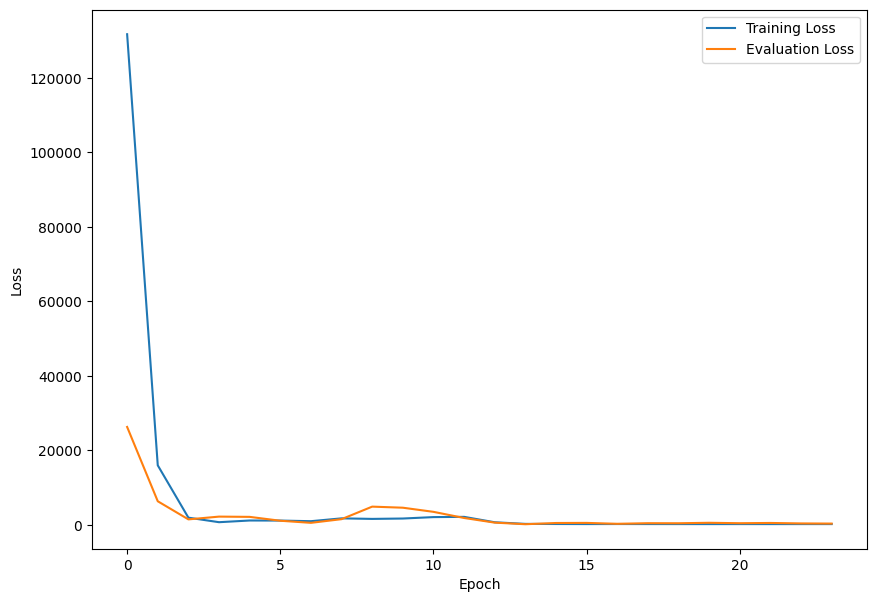

In [132]:
plt.figure(figsize=(10, 7))
plt.plot(model_10_history.history["loss"], label="Training Loss")
plt.plot(model_10_history.history["val_loss"], label="Evaluation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [134]:
model_10_history.history

{'loss': [131708.515625,
  15949.4091796875,
  1897.9163818359375,
  680.7669677734375,
  1135.206787109375,
  1117.154296875,
  950.859375,
  1712.5843505859375,
  1565.7420654296875,
  1667.4278564453125,
  2048.189697265625,
  2114.7119140625,
  662.3217163085938,
  226.73887634277344,
  194.85523986816406,
  175.49496459960938,
  188.9307403564453,
  178.3231658935547,
  174.05897521972656,
  168.37208557128906,
  174.91441345214844,
  168.67822265625,
  172.63790893554688,
  174.21694946289062],
 'val_loss': [26256.921875,
  6302.9609375,
  1438.6593017578125,
  2180.88818359375,
  2110.212646484375,
  1071.48583984375,
  509.57745361328125,
  1495.9454345703125,
  4859.63916015625,
  4571.470703125,
  3462.37890625,
  1812.6322021484375,
  564.4229125976562,
  137.34938049316406,
  465.67974853515625,
  493.2323303222656,
  247.22418212890625,
  412.1046142578125,
  397.8185119628906,
  523.820068359375,
  408.322021484375,
  475.8526916503906,
  351.23193359375,
  308.5566711425

In [139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_time_series_model(actual_values, predicted_values):
    """
    Evaluate a time series model for forecasting population.

    Parameters:
    - actual_values: 1D array or list of actual population values.
    - predicted_values: 1D array or list of predicted population values.

    Returns:
    - evaluation_results: Dictionary containing evaluation metrics.
    """
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(actual_values, predicted_values)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(actual_values, predicted_values)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Mean Absolute Percentage Error (MAPE)
    mask = actual_values != 0  # Avoid division by zero
    mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)[mask]) * 100

    # R-squared (R2)
    r2 = r2_score(actual_values, predicted_values)

    evaluation_results = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2
    }

    return evaluation_results

In [161]:
model_10_preds = tf.squeeze(model_10.predict(X_test))
model_10_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([299075.1 , 299314.34, 299564.97, 299825.7 , 300087.28, 300344.9 ,
       300601.84, 300843.62, 301085.03, 301324.8 ], dtype=float32)>

In [162]:
model_10_results = evaluate_time_series_model(y_test, model_10_preds)
model_10_results

{'MAE': 137.34938,
 'MSE': 24053.213,
 'RMSE': 155.09099,
 'MAPE': 0.043445645133033395,
 'R2': 0.9996930145529435}

In [141]:
%tensorboard --logdir model_logs/population --port 8080

Reusing TensorBoard on port 8080 (pid 30792), started 3:48:08 ago. (Use '!kill 30792' to kill it.)

In [163]:
residuals = y_test - model_10_preds
residuals

<tf.Tensor: shape=(161,), dtype=float32, numpy=
array([ 187.90625,  239.65625,  270.03125,  268.3125 ,  252.71875,
        229.09375,  200.15625,  177.375  ,  168.96875,  158.1875 ,
        179.6875 ,  205.3125 ,  221.40625,  248.5625 ,  251.5    ,
        238.25   ,  212.96875,  180.96875,  136.90625,  100.90625,
         82.84375,   65.28125,   82.65625,  103.15625,  124.40625,
        156.75   ,  164.34375,  153.65625,  130.65625,  100.28125,
         62.65625,   32.875  ,   17.71875,    5.53125,   24.21875,
         47.4375 ,   79.46875,  118.5625 ,  131.71875,  124.9375 ,
        103.59375,   73.65625,   41.59375,   14.125  , -218.09375,
       -219.375  , -194.90625, -158.15625,  -96.09375,  -64.15625,
        -52.59375,  -43.34375,  -35.1875 ,  -93.75   , -105.21875,
       -148.40625, -140.21875, -145.125  , -133.625  ,  -99.8125 ,
        -78.53125,  -43.5    ,  -22.15625,  -41.9375 ,  -63.46875,
        -84.28125, -120.03125, -139.75   , -147.40625, -161.9375 ,
       -144.21

In [164]:
standard_errors = np.std(residuals)
standard_errors

142.72287

In [165]:
margin_of_error = 1.96 * standard_errors
lower = model_10_preds - margin_of_error
upper = model_10_preds + margin_of_error

In [178]:
offset = np.abs(6-len(model_10_preds))
offset

155

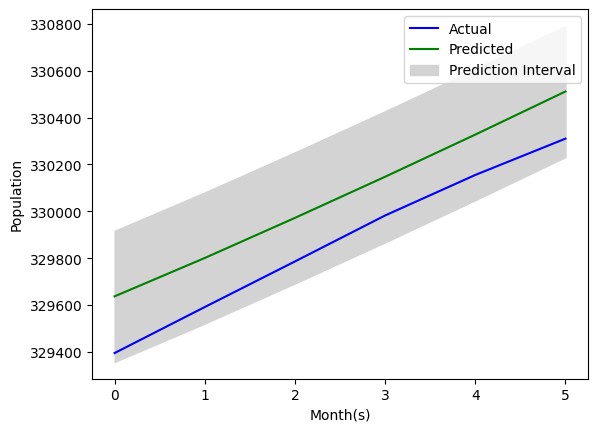

In [179]:
plt.plot(y_test[offset:], label='Actual', color='blue')
plt.plot(model_10_preds[offset:], label='Predicted', color='green')
plt.fill_between(range(len(model_10_preds[offset:])), lower[offset:], upper[offset:], color='lightgray', label='Prediction Interval')

plt.xlabel('Month(s)')
plt.ylabel('Population')
plt.legend()
plt.show()

In [175]:
model_10_preds

<tf.Tensor: shape=(161,), dtype=float32, numpy=
array([299075.1 , 299314.34, 299564.97, 299825.7 , 300087.28, 300344.9 ,
       300601.84, 300843.62, 301085.03, 301324.8 , 301559.3 , 301798.7 ,
       302045.6 , 302297.44, 302555.5 , 302815.75, 303074.03, 303325.03,
       303574.1 , 303806.1 , 304034.16, 304257.72, 304473.34, 304694.84,
       304920.6 , 305152.25, 305389.66, 305632.34, 305873.34, 306107.72,
       306339.34, 306555.12, 306769.28, 306978.47, 307181.78, 307391.56,
       307605.53, 307827.44, 308057.28, 308293.06, 308529.4 , 308759.34,
       308985.4 , 309197.88, 309409.3 , 309588.44, 309743.4 , 309903.84,
       310053.88, 310240.62, 310452.56, 310639.1 , 310816.9 , 311054.5 ,
       311218.6 , 311413.8 , 311576.47, 311752.22, 311924.84, 312096.88,
       312283.9 , 312472.62, 312666.3 , 312871.47, 313073.2 , 313267.47,
       313459.  , 313639.12, 313814.53, 313992.47, 314161.8 , 314335.3 ,
       314518.16, 314702.47, 314896.12, 315097.88, 315297.44, 315494.62,
   

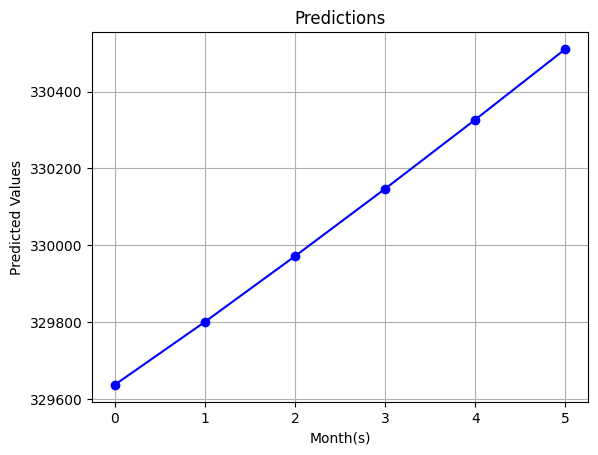

In [183]:
plt.plot(model_10_preds[offset:], marker='o', linestyle='-', color='b')
plt.xlabel('Month(s)')
plt.ylabel('Predicted Values')
plt.title('Predictions')
plt.grid(True)
plt.show()